The purpose of DWT algotrithm is to find an optimum mapping and distance between two time series.

In [2]:
def euc_distance(a, b):
    """Euclidian distance between two numbers"""
    return (a - b) ** 2

assert euc_distance(2, 1) == 1

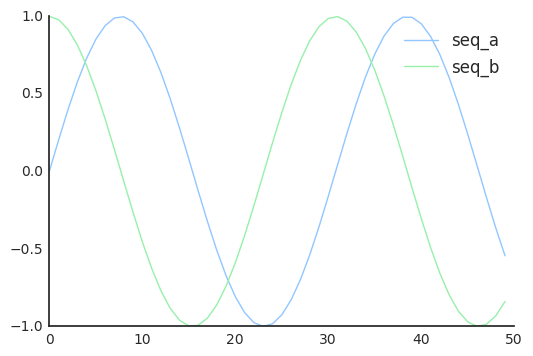

In [100]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# generate sin and cos sequences
idx = np.linspace(0, 10, num=50)
seq_a = np.sin(idx)
seq_b = np.cos(idx)

def remove_borders(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

def plot_seqs(seq_a, seq_b):
    plt.style.use('seaborn-white')
    a = plt.plot(seq_a, label='seq_a')
    plt.plot(seq_b, label='seq_b')
    plt.legend();

    ax = plt.gca()
    remove_borders(ax)
    
    return ax

plot_seqs(seq_a, seq_b)

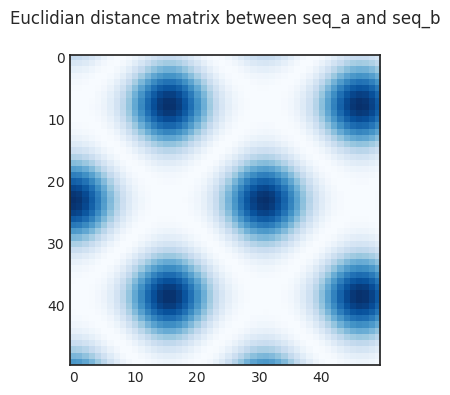

In [126]:
def pairwise_distance(x, y):
    """Calculate pairwise euclidian distance between two sequences
    
    Returns
    -------
    distance_matrix
    """
    distance_matrix = np.zeros((x.shape[0], y.shape[0]))
    
    for i in range(0, distance_matrix.shape[0]):
        for j in range(0, distance_matrix.shape[1]):
            distance_matrix[i, j] = (x[i] - y[j]) ** 2
    
    return distance_matrix

dist = pairwise_distance(seq_a, seq_b)
plt.title('Euclidian distance matrix between seq_a and seq_b', y=1.08)
plt.imshow(dist, interpolation='nearest', cmap='Blues')

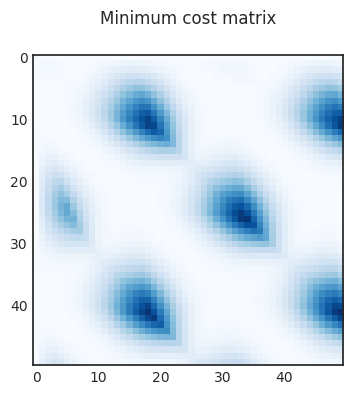

In [122]:
def distance_accumulated_cost(distance_matrix):
    """Calculate minimum cost matrix. Each element (i, j) contains minimum distance from 
    distance_matrix[0, 0] to disance_matrix[i, j]
    
    Returns
    -------
    cost
        cost matrix
    """
    cost = np.zeros(distance_matrix.shape)
    cost[0, 0] = distance_matrix[0, 0]
    
    for i in range(1, mat.shape[0]):
        for j in range(1, mat.shape[1]):
            min_cost = np.min([cost[i - 1, j - 1], cost[i, j - 1], cost[i - 1, j]])
            cost[i, j] = distance_matrix[i, j] + min_cost
            
    return cost

cost = distance_accumulated_cost(dist)
plt.title('Minimum cost matrix', y=1.08)
plt.imshow(cost, interpolation='nearest', cmap='Blues')

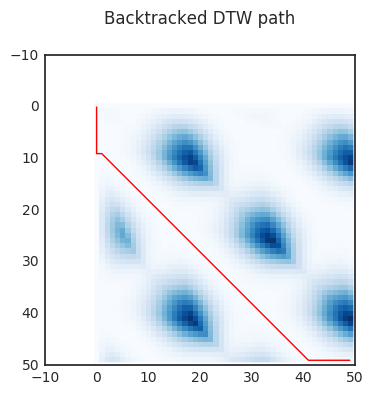

In [128]:
def backtrack_accumulated_cost(cost_matrix):
    """Backtrack the cost matrix and find the path that minimizes total cost
    
    Returns
    -------
    path : list
        list containing [x, y] elements of minimum cost path
        
    See Also
    --------
    distance_accumulated_cost
    """
    # start backtracking with last element of a matrix
    i = cost_matrix.shape[0] - 1
    j = cost_matrix.shape[1] - 1
    
    # j - x, i - y
    path = [[j, i]]
    
    while i > 0 and j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            j -= 1
        else:
            min_cost = np.min([cost_matrix[i - 1, j - 1], cost_matrix[i, j - 1], cost_matrix[i - 1, j]])
            
            if min_cost == cost_matrix[i - 1, j]:
                i -= 1
            elif min_cost == cost_matrix[i, j - 1]:
                j -= 1
            else:
                i -= 1
                j -= 1
        
        path.append([j, i])
    
    path.append([0, 0])
    
    return path

path = backtrack_accumulated_cost(cost)
plt.title('Backtracked DTW path', y=1.08)
plt.imshow(cost, interpolation='nearest', cmap='Blues')
plt.plot([p[0] for p in path], [p[1] for p in path], color='red')

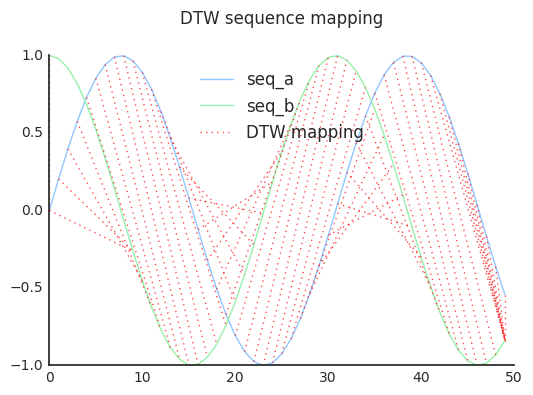

In [125]:
plot_seqs(seq_a, seq_b)

for [x, y] in path:
    l = plt.plot([x, y], [seq_a[x], seq_b[y]], ':', color='red', alpha=0.7)
    
l[0].set_label('DTW mapping')
plt.title('DTW sequence mapping', y=1.08)
plt.legend(loc='best')

In [131]:
def dtw_distance(seq_a, seq_b):
    """Calculates DTW distance between two sequences."""
    
    dist = pairwise_distance(seq_a, seq_b)
    cost = distance_accumulated_cost(dist)
    path = backtrack_accumulated_cost(cost)
    
    # remember that we flipped i and j in path before
    return sum([cost[i, j] for [j, i] in path])

dtw_distance(seq_a, seq_b)

7.3955073274805176